In [4]:
# Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only do all
# these features make training extremely slow, but they can also make it much harder to find a good solution, as we will
# see. This problem is often referred to as the curse of dimensionality. Fortunately, in real-world problems, it is often
# possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example
# consider the MNIST images: the pixels on the image borders are almost always white, so you could completely drop these
# pixels from the training set without losing much information. Figure 7-6 confirms that these pixels are utterly
# unimportant for the classification task. Additionally, two neighboring pixels are often highly correlated: if you merge
# them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information.

# Reducing dimensionality does cause some information loss (just like compressing an image to JPEG can degrade its
# quality), so even though it will speed up training, it may make your system perform slightly worse. It also makes your
# pipelines a bit more complex and thus harder to maintain. So, if training is too slow, you should first try to train
# your system with the original data before considering using dimensionality reduction. In some cases, reducing the
# dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher
# performance, but in general it won’t; it will just speed up training.

# Dimensionality reduction is also used for data visualization - reducing to 2D or 3D means we can plot a condensed view of
# high-dimensional training data and often gain important insights by visually detecting patterns like clusters. DataViz
# is also useful in communicating your conclusions to non data scientitsts.

In [5]:
# Curse of Dimensionality
# In low dimensional space, the probability that a random point is 'extreme' or close to the border of some enclosing shape
# is small (for instance in a unit square). In high dimensions, like a 10000-D hypercube, the probability is extremely
# high - most points in such a hypercube are very close to the border (i.e. if you consider enough dimensions, the chance
# that any one of the coordinates is close to the border is very high).

# A more troublesome difference is that if you pick two points randomly in a unit square, the distance between these two
# points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be
# roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? The average distance,
# believe it or not, will be about 408.25 (roughly 1, 000, 000/6)! This is counterintuitive: how can two points be so far
# apart when they both lie within the same unit hypercube? Well, there’s just plenty of space in high dimensions. As a
# result, high-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away
# from each other. This also means that a new instance will likely be far away from any training instance, making
# predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In
# short, the more dimensions the training set has, the greater the risk of overfitting it.

# In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a
# sufficient density of training instances. Unfortunately, in practice, the number of training instances required to
# reach a given density grows exponentially with the number of dimensions. With just 100 features (significantly fewer
# than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for
# training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all
# dimensions.

In [6]:
# The main approaches to dimensionality reduction are projection and Manifold Learning.
# In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are
# almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances
# lie within (or close to) a much lower-dimensional subspace of the high-dimensional space. For instance, points in 3D
# space may lie close to a plane (a 2D subspace of the high dimensional 3D space). Projecting the data perpendicularly onto
# this subspace, we get a 2D dataset, reducing the dimensionality and producing two new features for the data relative
# to this 2D subspace (the coordinates of the projections).

# Projection is not always the best approach - in many cases the subspace may twist and turn, such as for the 3D Swiss Roll
# toy dataset. Projecting this onto a plane (such as by dropping x3) squashes different layers of the roll together -
# ideally we would want to 'unroll' the data onto a 2D subspace (very likely with new features). This Swiss Roll is a form
# of 2D manigold - a 2D shape that can be bent and twisted into a higher-dimensional space. In general a d-dim manifold
# is part of an n-dim space (where d < n) that locally resembles a d-dim hyperplane (so above, d=2, n=3: it resembles
# a 2D plane but is rolled in the third dimension).

# Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is
# called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that
# most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often
# empirically observed.
# Once again, think about the MNIST dataset: all handwritten digit images have some similarities. They are made of
# connected lines, the borders are white, and they are more or less centered. If you randomly generated images, only a
# ridiculously tiny fraction of them would look like handwritten digits. In other words, the degrees of freedom available
# to you if you try to create a digit image are dramatically lower than the degrees of freedom you would have if you were
# allowed to generate any image you wanted. These constraints tend to squeeze the dataset into a lower-dimensional
# manifold.
# The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification
# or regression) will be simpler if expressed in the lower-dimensional space of the manifold. For example, in the top row
# of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be
# fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line.
# However, this implicit assumption does not always hold. For example, in the bottom row of Figure 8-6, the decision
# boundary is located at x1 = 5. This decision boundary looks very simple in the original 3D space (a vertical plane), but
# it looks more complex in the unrolled manifold (a collection of four independent line segments).
# In short, reducing the dimensionality of your training set before training a model will usually speed up training, but
# it may not always lead to a better or simpler solution; it all depends on the dataset.

In [7]:
# Principal Component Analysis (PCA) is the most popular dimenionality-reduction algorithm - it identifies the hyperplane
# that lies closest to the data, then projects the data onto it.

# First, the right hyperplane needs to be chosen. Of the many possible choices of hyperplane, we want to select the one
# that preserves the maximum amount of variance in the data, as it will most likely lose less information than other
# projections. In the case of a 2D dataset, this is the axis along which the maximum amount of variance is preserved.
# In a different sense, this will be the same axis that minimizes the mean squared distance between the original dataset
# and its projection onto that axis - this is the simple idea behind PCA.
# Secondly, after finding the above axis it finds a second one, orthogonal to the first, which accounts for the
# largest amount of remaining variance. The algorithm then finds a third, orthogonal to both previous axes, and a fourth,
# and continues until it has as many axes as dimensionality of the dataset.

# The ith axis is called the ith principal component (PC) of the data.
# N.B. For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC. Since two
# opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable: if you
# perturb the training set slightly and run PCA again, the unit vectors may point in the opposite direction as the original
# vectors. However, they will generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate
# or swap (if the variances along these two axes are close), but the plane they define will generally remain the same.

# The PCs are found via Singular Value Decomposition (SVD): this decomposes the training set matrix X into a matrix
# multiplication of three matrices U Σ V⊺, where V contains the unit vectors that define all the principal components that
# we are looking for (contained as the columns of V).

import numpy as np

np.random.seed(42)
X = 5*np.random.rand(10, 3)

# PCA assumes the dataset is centered about the origin - sklearn PCA classes do this themselves but when using
# personal implementations or other libraries it may be required to center the data first.

# mean taken along the rows (collapse rows), so mean for each coordinate/feature.
X_centered = X - X.mean(axis=0)
# have to transpose Vt to get V (without any transpose), then each PC is a column of V
U, s, Vt = np.linalg.svd(X_centered)
print(Vt.T)

[[ 0.51194429 -0.17295472  0.84142719]
 [-0.85454939 -0.20232689  0.47834001]
 [-0.08751218  0.96392453  0.25137844]]


In [8]:
# Once the PCs have been found, the dataset can be reduced to d dimensions by projecting it onto the hyperplane defined
# by the first d PCs - this hyperplane preserves as much variance as possible (so the projection is as 'truthful' as 
# possible). Defining W_d as the matrix contatining the first d columns of V, we get the reduced X: X_dproj = X.W_d 

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
print(X[:3], X2D[:3], sep='\n')

[[1.87270059 4.75357153 3.65996971]
 [2.99329242 0.7800932  0.7799726 ]
 [0.29041806 4.33088073 3.00557506]]
[[-2.42118524  0.95037868]
 [ 1.80006367 -1.21559131]
 [-2.81274807  0.67877657]]


In [9]:
# Scikit-Learn's PCA class uses SVD decomposition to implement PCA, as above. Once fitted, the components_ attribute holds
# the transpose of W_d

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

pca.components_.T

array([[-0.51194429, -0.17295472],
       [ 0.85454939, -0.20232689],
       [ 0.08751218,  0.96392453]])

In [10]:
# The explained variance ratio of each PC indicates the proportion of the dataset's varaince that lies along each PC.
# This output, via the explained_variance_ratio_ attribute, tells us that 50.1% of the datasets variance lies along
# the first PC and 35.6% along the second, leaving 14.3% for the third, suggesting the third PC carriers a reasonable
# amount of information.
pca.explained_variance_ratio_

array([0.50114049, 0.35591274])

In [11]:
# Rather than arbitrarily choosing, it is often simpler to pick the number of dimensions that add up to a sufficiently 
# large proportion of the variance (e.g. 95%) - unless you are reducing the dimensionality for visualization (in which case
# you want a dimensionality of 2 or 3).

D = 10
X_train = 10*np.random.rand(100, D)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

# An even simpler option is to set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you 
# wish to preserve.

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [12]:
# Another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum) - there
# will usually be an elbow in the curve where the explained variance stops growing fast.

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [13]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.95) + 1

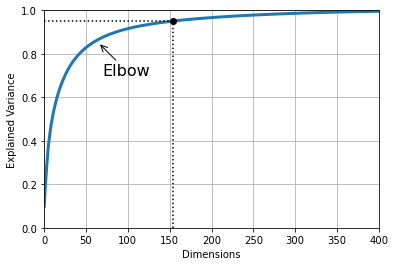

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

# We can see that selecting n_components=100 will mean we preserve a reasonable amount of the dataset's variance.

In [15]:
# Note that applying PCA to the MNIST dataset has compressed the data - preserving 95% of the variance means each instance
# will have 150 features rather than the original 784, so the data takes up less than 20% of the original size. This
# significant compression can lead to a good speed up in a classification algorithm (such as an SVM classifier).

# We can also decompress the reduced dataset by applying the inverse transformation of the PCA projection. This does not 
# give back the original data, since the projection lost some information (within the 5% variance which was dropped), but
# it will likely be close to the original data. X_recovered = X_dproj.W_d^T. 
# The mean squared distance between the original and reconstructed data is called the reconstruction error. 

pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

# In this case there is some image quality loss, but the digits are mostly still intact.

In [16]:
# Setting the hyperparameter svd_solver='randomized' means sklearn uses a stochastic algorithm called Randomized PCA which
# quickly finds an approximation of the first d PCs. It has computational complexity O(m x d^2) + O(d^3) instead of 
# O(m x n^2) + O(n^3) for the full SVD approach, so it is dramatically faster than full SVD when d << n.
# The default for svd_solver is 'auto', sklearn automatically uses Randomized PCA if m or n is greater than 500 and 
# d is less than 80% of m or n. Otherwise it uses the full SVD approach. Setting svd_solver='full' forces sklearn to
# use full SVD.

pca = PCA(n_components=154, svd_solver='full')
rnd_pca = PCA(n_components=154, svd_solver='randomized')
%timeit X_reduced = pca.fit_transform(X_train)
%timeit X_reduced_rnd = rnd_pca.fit_transform(X_train)

2.99 s ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3 s ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# Incremental PCA algorithms allow you to split the training set into mini-batches and feed an IPCA algorithm one 
# mini-batch at a time. This is useful for large training sets and for applycing PCA online (as new instances arrive) - 
# the previous PCA implmentations require the whole training set to fit in memory to run.

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

In [ ]:
# Alternatively there is the Numpy memmap class, which allows you to manipulate a large array stored in a binary file on 
# disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it. Since the 
# IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control. This
# makes it possible to call the usual fit() method, as you can see in the following code:
"""
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
"""

In [39]:
# In Chapter 5 we discussed the kernel trick, a mathematical technique that implicitly maps instances into a very 
# high-dimensional space (called the feature space), enabling nonlinear classification and regression with SVMs. 
# Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision
# boundary in the original space. It turns out that the same trick can be applied to PCA, making it possible to perform
# complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA).

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [63]:
# As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel
# and hyperparameter values. That said, dimensionality reduction is often a preparation step for a supervised learning task
# (e.g., classification), so you can use grid search to select the kernel and hyperparameters that lead to the best 
# performance on that task. The following code creates a twostep pipeline, first reducing dimensionality to two dimensions
# using kPCA, then applying Logistic Regression for classification. Then it uses GridSearchCV to find the best kernel 
# and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.08, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03555556, 0.04111111, 0.04666667, 0.05222222,
       0.05777778, 0.06333333, 0.06888889, 0.07444444, 0.08      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [64]:
print(grid_search.best_params_)

{'kpca__gamma': 0.04666666666666666, 'kpca__kernel': 'rbf'}


In [69]:
# Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest
# reconstruction error. Note that reconstruction is not as easy as with linear PCA. Thanks to the kernel trick, the 
# transformation from the original space to the reduced space involves an intermediate step: the feature map φ first 
# maps the training set to an infinite dimensional feature space, then we project the transformed training set down to
# the 2D reduced space using linear PCA.
# See Figure 8-11
# Notice that if we could invert the final linear PCA step for a given instance in the reduced space, the reconstructed 
# point lies in the infinite-dimensional feature space, not in the original space, so we cannot compute the reconstructed 
# point, and therefore we cannot compute the true reconstruction error. 
# Fortunately, it is possible to find a point in the original space that would map close to the reconstructed point. 
# This point is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to
# the original instance. You can then select the kernel and hyperparameters that minimize this reconstruction pre-image 
# error.
# One way to perform this reconstruction is by training a supervised regression model, with the projected instances acting
# as the training set and the original instances as targets. Scikit-Learn does this automatically if the hyperparameter 
# fit_inverse_transform=True. By default, fit_inverse_transform=False and KernelPCA has no inverse_transform() method. This method only gets created 
# when you set fit_inverse_transform=True.

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0466,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

# Then, compute the reconstruction pre-image error, then use grid search with CV to find the kernel and hyperparameters 
# that minimize this error.

from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

4.852076810141359e-27

In [70]:
# Other than PCA, Locally Linear Embedding (LLE) is a powerful nonlinear dimensionality reduction (NLDR) technique. It is
# a Manifold Learning technique that does not rely on projections - LLE works by first measuring how each training
# instance linearly relates to its closest neighbours, and then the algorithm looks for a low-dimensional representation 
# of the training set where these local relationships are best preserved. This makes it particularly good at unrolling 
# twisted manifolds, especially when there is little noise.

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

# The resulting reduced dataset (from the initial Swiss roll) is completely unrolled, and the distances between instances
# are locally well preserved. However, distances are not preserved on a larger scale: the left part of the unrolled Swiss
# roll is stretched, while the right part is squeezed. Nevertheless, LLE did a pretty good job at modeling the manifold.

In [ ]:
# See book for complete LLE algorithm explaination.

# Scikit-Learn’s LLE implementation has the following computational complexity: O(mlog(m) nlog(k)) for finding the
# k nearest neighbors, O(mnk^3) for optimizing the weights, and O(dm^2) for constructing the low-dimensional 
# representations. Unfortunately, the m2 in the last term makes this algorithm scale poorly to very large datasets.

In [ ]:
# Other Dimensionality Reduction Techniques

# Random Projections
# As its name suggests, projects the data to a lower-dimensional space using a random linear projection. It turns out that
# such a random projection is actually very likely to preserve distances well, as was demonstrated mathematically by
# William B. Johnson and Joram Lindenstrauss in a famous lemma. The quality of the dimensionality reduction depends on the
# number of instances and the target dimensionality, but surprisingly not on the initial dimensionality.
# Check out the documentation for the sklearn.random_projection package for more details.

# Multidimensional Scaling (MDS)
# Reduces dimensionality while trying to preserve the distances between the instances.

# Isomap
# Creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to
# preserve the geodesic distances between the instances (the geodesic distance between two nodes in a graph is the number
# of nodes on the shortest path between these nodes).

# t-Distributed Stochastic Neighbor Embedding(t-SNE)
# Reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used
# for visualization, in particular to visualize clusters of instances in high-dimensional space(e.g., to visualize the
# MNIST images in 2D).

# Linear Discriminant Analysis (LDA)
# Is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these
# axes can then be used to define a hyperplane onto which to project the data. The benefit of this approach is that the
# projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running
# another classification algorithm such as an SVM classifier.